# Tadele Yednkachw

# Prediction using Supervised ML

# Step 1 : Frame the problem

        1) Since we're given labeled training example we should use supervised learning algorithms.
        2) our trained model should return value thus it is a regression problem.
        3) there is one feature in the data, so it is a simple linear regression problem.
        4) our model output should be a single value, it is a univariate regression problem.
        5) since the dataset is small enough to fit in memeory at once we can use batch learning.

# Step 2 : Select a performance measure
    
        -A performance measure gives us how much error the system typically makes in its prediction.
        -I choose root mean squared error(RMSE), because its typical choice on simple regression problems, and the trainging example does not have an extreme outliers.
       -Root mean squared error is cost function measured on the set of examples using our hypothesis h
       -Explanation on RMSE parameters:
            1) h -our systems prediction function also called hypothesis 
                 -when our system given an instance's feature vector x(i), it outputs y_hat = h(x(i))
                 
            2) X-is a matrix containing all features values without the lables of all instances in the dataset.
            3) x(i) -is a vector of all feature values without the label of the ith instance in the dataset.
            4) m -is the number of instances in the dataset.

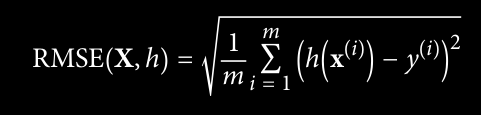

# Step 3 : Get the Data and save it in local system

In [23]:
import requests
import os
import csv
DOWNLOAD_DIRECTORY = "http://bit.ly/w-data"
STUDY_HOURS_PATH = os.path.join("datasets", "task_1")
def fetch_data(DOWNLOAD_DIRECTORY):
    os.makedirs(STUDY_HOURS_PATH, exist_ok=True)
    r = requests.get(DOWNLOAD_DIRECTORY)
    decoded_content = r.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    file_path = os.path.join(STUDY_HOURS_PATH, "study_hours.csv")
    with open(file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
        for elt in my_list:
            writer.writerow(elt)
fetch_data(DOWNLOAD_DIRECTORY)

IsADirectoryError: [Errno 21] Is a directory: 'datasets/task_1/study_hours.csv'